<a href="https://colab.research.google.com/github/soniya1993/cross-insurance-selling/blob/main/Classification_Insurance_Cross_Selling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing basic libraries
import pandas as pd
import seaborn as sns
import numpy as np


#Objective

    Understanding what is Cross-sell using Vehicle insurance data.
    building how to build a model for cross-sell prediction.

#Cross-Sell Prediction Using Machine Learning in Python

In [ ]:
#importing data
df=pd.read_csv('/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv')

In [ ]:
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [ ]:
df.shape

(381109, 12)

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
#checking duplicates in data
df.duplicated(subset=None, keep='first')

0         False
1         False
2         False
3         False
4         False
          ...  
381104    False
381105    False
381106    False
381107    False
381108    False
Length: 381109, dtype: bool

In [ ]:
#checking null values in data
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


    There is no missing value in the data
    By looking at the info of the dataset we can get a rough idea on the numeric and the string columns



#Exploratory Data Analysis

Response : 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

Response : 1 : Customer is interested, 0 : Customer is not interested

In [ ]:
#importing libraries
import matplotlib.pyplot as plt

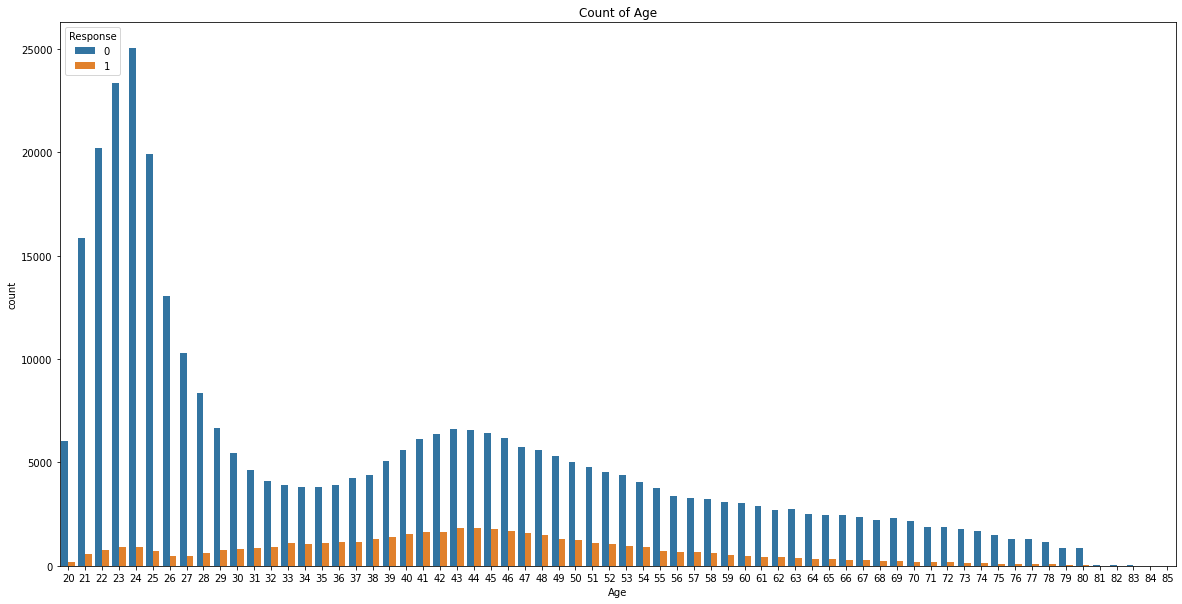

0 means not interested
1 means interested


In [ ]:
#plotting graph to check which age group is more interested in taking insurance
plt.figure(figsize=(20,10))
sns.countplot(x ='Age', hue = "Response", data = df)
plt.title('Count of Age')
plt.show()
print('0 means not interested')
print('1 means interested')

**Observation- **

1) Young people below 30, are not interested in vehicle insurance.Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.
    
2) Elder people above 70, are not interested in vehicle insurance.Reasons could be Life Expectancy , avoiding financial stress , Higher premium requirements

3)People aged between 30-60 are more likely to be interested.




<Figure size 720x432 with 0 Axes>

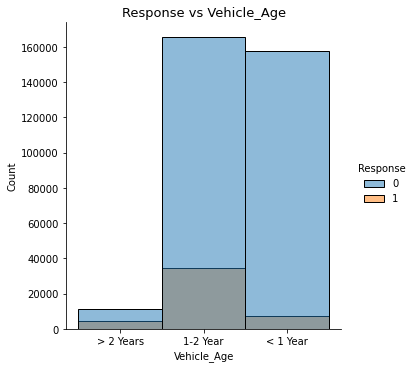

<Figure size 720x432 with 0 Axes>

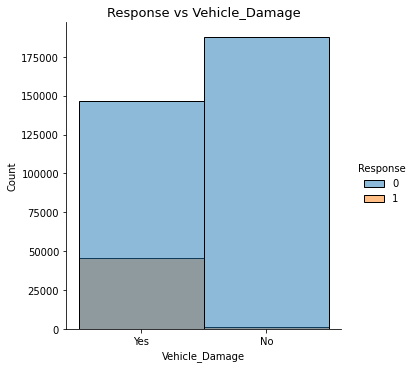

<Figure size 720x432 with 0 Axes>

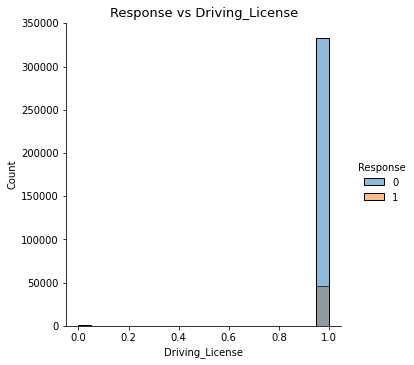

<Figure size 720x432 with 0 Axes>

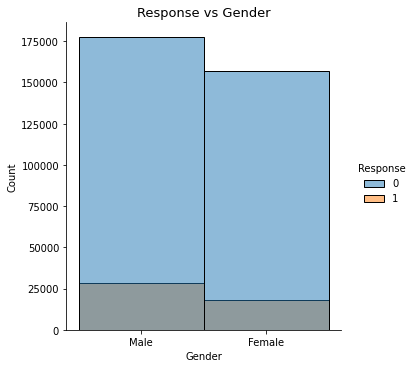

In [ ]:
#plotting graph for vehicle age, Vehicle_Damage,Driving_License,Gender
#with the help of for loop
columns=['Vehicle_Age','Vehicle_Damage','Driving_License','Gender']
for i,ii in enumerate(columns):
  plt.figure(figsize = (10,6))
  sns.displot(df,x=ii, hue="Response")
  plt.title(f'Response vs {ii}', fontsize=13)
  plt.show()

#plt.figure(figsize=(20,10))
#ax1=sns.countplot(x ='Gender', hue = "Response", data = df,)
#plt.title('Count of gender')
#plt.show()


 **Observation**
 
1)male member are more interested in insurance plan

2)vehicle with age 1-2 years are interested in taking insurance

3)Customers who are interested in Vehicle Insurance almost all have driving license

4) perons with vehicle damage only are interested in insurance

In [ ]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


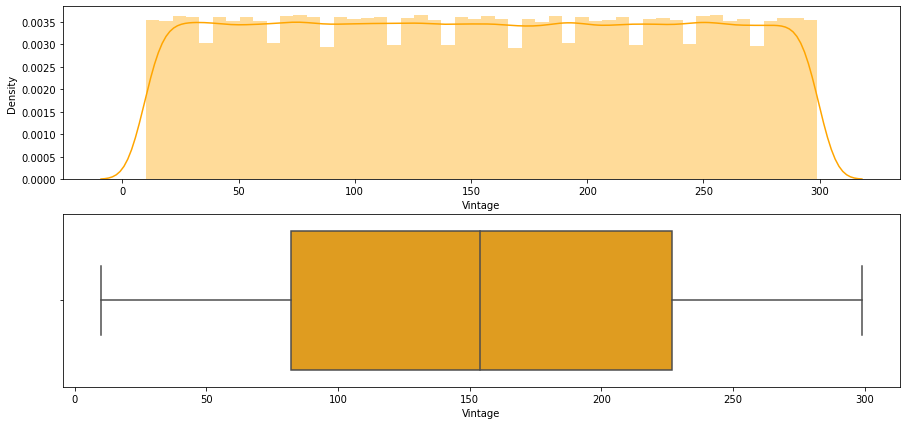

In [ ]:
#plooting graphn for vintage
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(15,7))
axx = ax.flatten()
sns.distplot(df['Vintage'],ax=axx[0], color='orange')
sns.boxplot (df['Vintage'],ax=axx[1],color='orange')


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


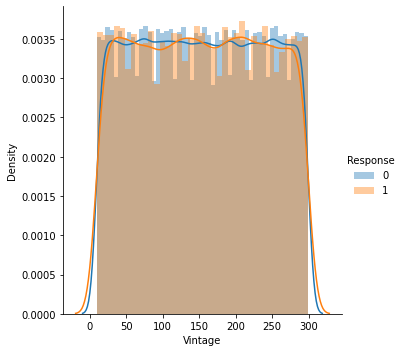

In [ ]:
sns.FacetGrid(df ,hue='Response',size=5).map(sns.distplot,"Vintage").add_legend();
plt.show()

**Observation**

1)The Feature Vintage has very less information and is Uniformly Distributed , With no skew .Also, the Values are uniformly mixed , in both the classes of the target variable response .

2)Since this Feature potentially contribute to Over Fitting , Or it can also contain hidden information ( nonlinear , conditional states ) we need to analyse the feature_importances for this feature and decide whether to reatin it or not


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


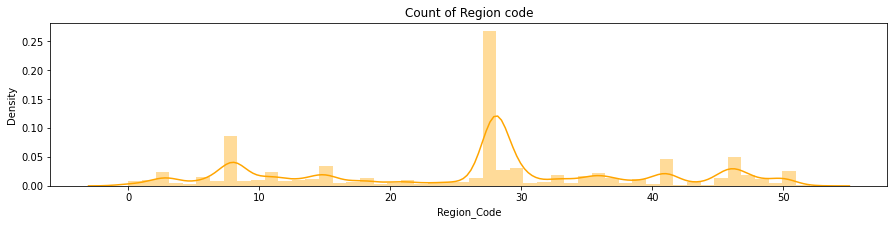

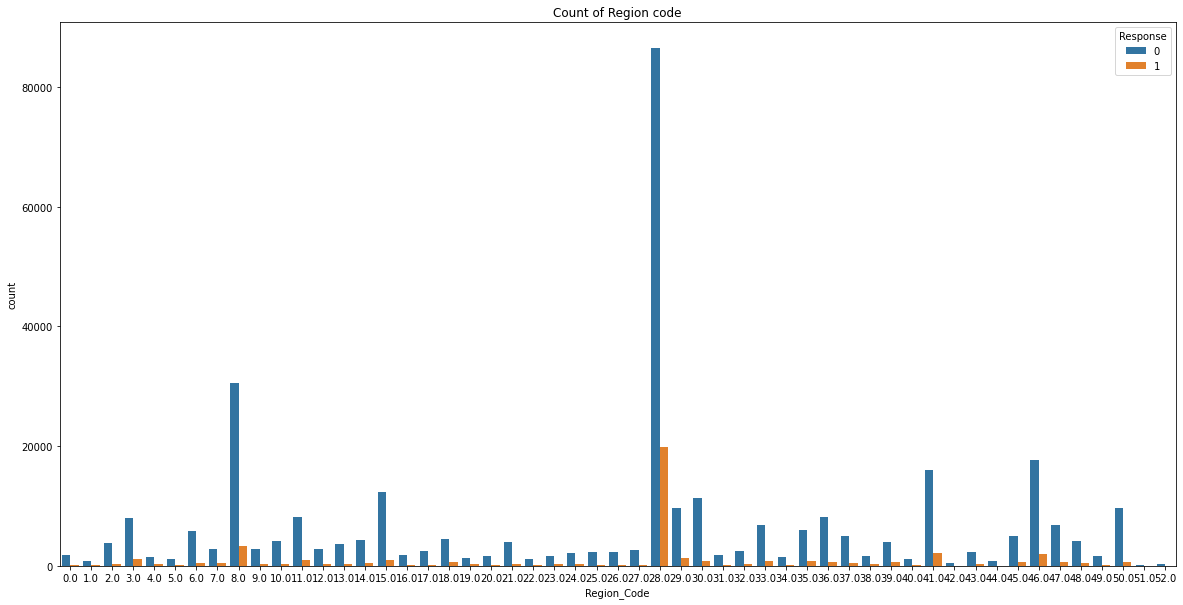

In [ ]:
#plotting graph for regoin code
plt.figure(figsize = (15,3))
sns.distplot(df['Region_Code'], color = 'orange')
plt.title('Count of Region code')
plt.figure(figsize=(20,10))
sns.countplot(x ='Region_Code', hue = "Response", data = df,)
plt.title('Count of Region code')
plt.show()

**Observation**

1)The individuals with region code 28 are the most as compared to the other ones are interested in insurance

In [ ]:
pd.pivot_table( df, index='Response', values='Policy_Sales_Channel' , aggfunc=['median'] )

,median
,Policy_Sales_Channel
Response,
0,152.0
1,124.0


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


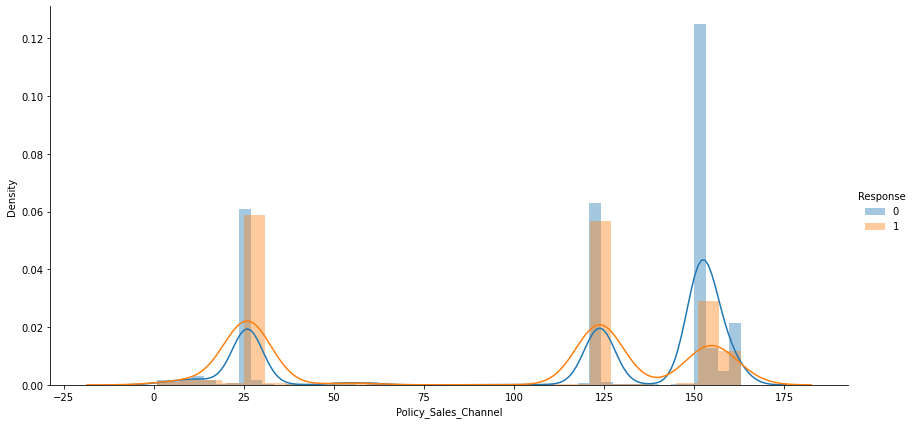

In [ ]:
sns.FacetGrid(df,hue='Response',size=6,aspect = 2).map(sns.distplot,"Policy_Sales_Channel").add_legend();
plt.show()

**Observation**

1)The most used sales channels are 152, 26 and 124. The best channel that results in customer interest is 152.

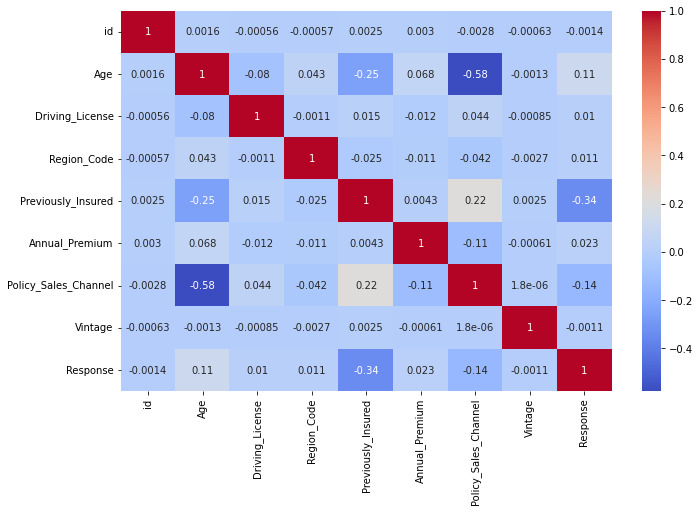

In [ ]:
#heatmap for correlation
fig, ax = plt.subplots(figsize = ( 11 , 7 ))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

**Observation**

1) Age and annual premium is highly corelated i.e 68%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


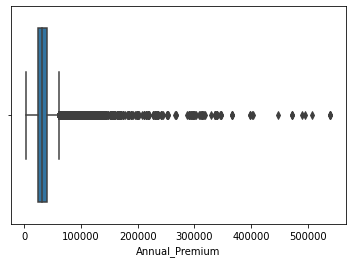

In [ ]:
sns.boxplot(df['Annual_Premium'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


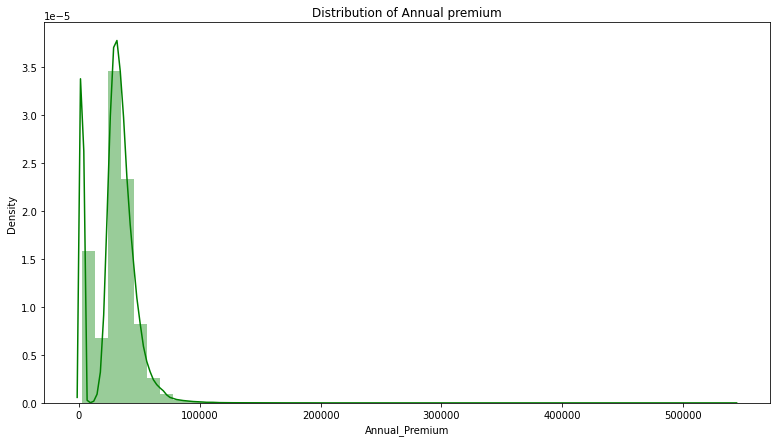

In [ ]:
plt.figure(figsize=(13,7))
sns.distplot(df['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()

**Observation**
    
1)From the distribution plot we can infer that the annual premimum variable is right skewed

2)From the boxplot we can observe lot of outliers in the variable



In [ ]:
# dropping id
df.drop('id',axis=1,inplace=True)

#Label encoding and Data preprocessing

In [ ]:
df['Vehicle_Age']= df['Vehicle_Age'].replace({'< 1 Year':0,'1-2 Year':1,'> 2 Years':2})
df['Gender']= df['Gender'].replace({'Male':1,'Female':0})
df['Vehicle_Damage']= df['Vehicle_Damage'].replace({'Yes':1,'No':0})

df.head(5)

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,0,0,27496.0,152.0,39,0


1)male-1 female-0

2)yes=1,no=0

3)< 1 Year':0,'1-2 Year':1,'> 2 Years':2

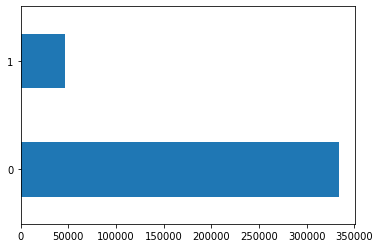

In [ ]:
df['Response'].value_counts().plot(kind='barh')

**Observation**

1) From the above observation we can clearly see the data is imbalanced we will try to handel imbalance data

In [ ]:
#Using SMOTE for oversampling
from imblearn.over_sampling import SMOTE

In [ ]:
X = df.drop(['Response'], axis=1)
y = df['Response']

In [ ]:
sm = SMOTE(random_state=42)

In [ ]:
X_sm, y_sm = sm.fit_resample(X, y)


In [ ]:
print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

Shape of X before SMOTE: (381109, 10)
Shape of X after SMOTE: (668798, 10)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Response, dtype: float64

**Data Training and Modeling**

Training Models used:

    1)Logistic Regression

    2)Random forest classifier

    3)Decision Tree
    
    4)K nearest neighbour
  



#Random forest classifier

In [ ]:
#importing libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.25, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix,f1_score,precision_score

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

##model_accuracy= accuracy_score(preds,y_test)
#model_precision= precision_score(preds,y_test)
#model_recall= recall_score(preds,y_test)
#model_f1_score= f1_score(preds, y_test)
#print(f'Accuracy on test data = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')

In [ ]:
model_accuracy= accuracy_score(preds,y_test)
model_precision= precision_score(preds,y_test)
model_recall= recall_score(preds,y_test)
model_f1_score= f1_score(preds, y_test)

In [ ]:
print('Performance of RandomForestClassifier Classifier')
print('Accuracy :' , model_accuracy)
print('Precision :', model_precision)
print('Recall :', model_recall)
print('F1 Score :', model_f1_score)


Performance of RandomForestClassifier Classifier
Accuracy : 0.8875717703349282
Precision : 0.908011904904199
Recall : 0.8724919316863637
F1 Score : 0.8898976173183704


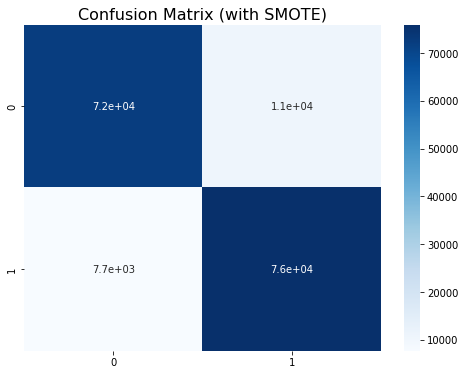

In [ ]:
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

#Logitic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_predictions= lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier
Accuracy : 0.7778409090909091
Precision : 0.9526911537955847
Recall : 0.7060287708606455
F1 Score : 0.8110198163363943


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

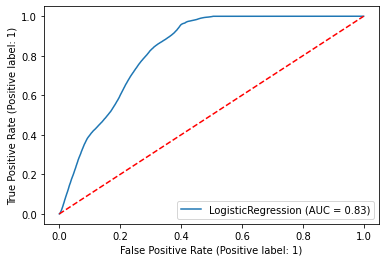

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

In [ ]:
#Hyperparameter Tuning for Logistic Regression
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2'] # By default its l1
c_values = [100, 10, 1.0, 0.1, 0.01] # less the c values 
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values) 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1) # 5*3*15 = 225
grid_search_lr = GridSearchCV(estimator=lr, param_grid=grid, n_jobs=10, cv=cv, scoring='f1',error_score=0,verbose=3)
grid_result = grid_search_lr.fit(X_train, y_train)

Fitting 30 folds for each of 15 candidates, totalling 450 fits


In [ ]:
lr_predictions= grid_search_lr.predict(X_test)

#Performance Metrics
lr_accuracy= accuracy_score(lr_predictions,y_test)
lr_precision= precision_score(lr_predictions,y_test)
lr_recall= recall_score(lr_predictions,y_test)
lr_f1_score= f1_score(lr_predictions, y_test)

print('Performance of Logistic Regression Classifier after hyperparameter tuning')
print('Accuracy :' , lr_accuracy)
print('Precision :', lr_precision)
print('Recall :', lr_recall)
print('F1 Score :', lr_f1_score)

Performance of Logistic Regression Classifier after hyperparameter tuning
Accuracy : 0.7786363636363637
Precision : 0.962767292590512
Recall : 0.7038140591550527
F1 Score : 0.8131726129182063


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

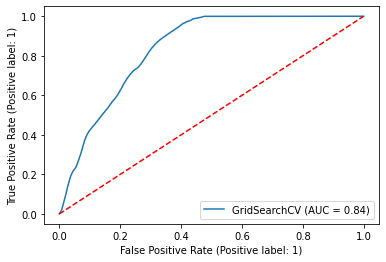

In [ ]:
from sklearn.metrics import plot_roc_curve
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(grid_search_lr,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

Observation-

1)No much difference w.r.t before/after Hyperparameter Tuning.
slight difference in Auc and F1 score

#KNN model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  
knn= KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_predictions= knn.predict(X_test)

#Performance Metrics
knn_accuracy= accuracy_score(knn_predictions,y_test)
knn_precision= precision_score(knn_predictions,y_test)
knn_recall= recall_score(knn_predictions,y_test)
knn_f1_score= f1_score(knn_predictions, y_test)

print('Performance of KNN Classifier')
print('Accuracy :' , knn_accuracy)
print('Precision :', knn_precision)
print('Recall :', knn_recall)
print('F1 Score :', knn_f1_score)

Performance of KNN Classifier
Accuracy : 0.8085526315789474
Precision : 0.9499420293319627
Recall : 0.7407010447636001
F1 Score : 0.832373271889401


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

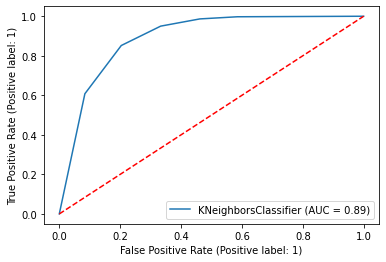

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(knn,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

#Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
dTree= DecisionTreeClassifier()
dTree.fit(X_train,y_train)
dTree_predictions= dTree.predict(X_test)

In [ ]:
dTree_accuracy= accuracy_score(dTree_predictions,y_test)
dTree_precision= precision_score(dTree_predictions,y_test)
dTree_recall= recall_score(dTree_predictions,y_test)
dTree_f1_score= f1_score(dTree_predictions, y_test)

In [ ]:
print('Performance of DecisionTreeClassifier')
print('Accuracy :' , dTree_accuracy)
print('Precision :', dTree_precision)
print('Recall :', dTree_recall)
print('F1 Score :', dTree_f1_score)

Performance of DecisionTreeClassifier
Accuracy : 0.8794258373205741
Precision : 0.888576790217898
Recall : 0.872762065767384
F1 Score : 0.8805984293007665


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 1080x576 with 0 Axes>

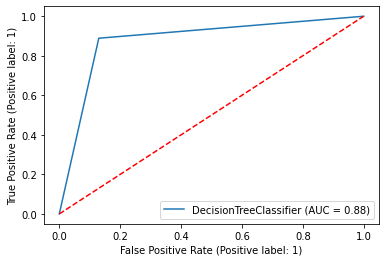

In [ ]:
plt.figure(figsize=(15,8))
svc_disp = plot_roc_curve(dTree,X_test,y_test)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)
plt.plot(x,y,'b--',color='r')
plt.show()

**Conclusion- **

1)Decision Tree and Random forest classifier are performing good on data 

2) Logistic regression not showing good result

THANK YOU